## Finger demo
Example of a fit to two fixed pcm-models
The example of the models and data is taken from Ejaz et al. (2015).
Nature Neuroscience: "Hand usage predicts.." 
We fit the follwoing 5 models 
* null: G=np.eye, all finger patterns are equally far away from each other, Note that in many situations the no-information null model, G = np.zeros, maybe , more appropriate   
* Muscle: Fixed model with G = covariance of muscle activities 
* Natural: Fixed model with G = covariance of natural movements
* Muscle+nat: Combination model of muscle and natural covariance 
* Noiseceil: Noise ceiling model 

In [46]:
# Import necessary libraries
import PcmPy as pcm
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the activity Data, condition vector, partition vector, 
# and model matrices for Muscle (0) and Natural stats Models (M)
f = open('data_demo_finger7T.p','rb')
Data,cond_vec,part_vec,modelM = pickle.load(f)
f.close()

In [3]:
# Build the datasets from the Data and condition vectors 
Y = list()
for i in range(len(Data)):
    obs_des = {'cond_vec': cond_vec[i],
               'part_vec': part_vec[i]}
    Y.append(pcm.Dataset(Data[i],obs_descriptors = obs_des))

In [4]:
# Estimate and plot the second moment matrices across all data sets
N=len(Y)
G_hat = np.zeros((N,5,5))
for i in range(N):
    G_hat[i,:,:],_ = pcm.util.est_G_crossval(Y[i].measurements,
                            Y[i].obs_descriptors['cond_vec'],
                            Y[i].obs_descriptors['part_vec'],
                            X=pcm.matrix.indicator(Y[i].obs_descriptors['part_vec']))

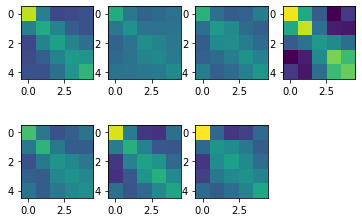

In [5]:
# show all second moment matrices
vmin = G_hat.min()
vmax = G_hat.max()
for i in range(N):
    plt.subplot(2,4,i+1)
    plt.imshow(G_hat[i,:,:],vmin=vmin,vmax=vmax)

In [6]:
# Build models from the second momement matrices
M = []
M.append(pcm.ModelFixed('null',np.eye(5)))
M.append(pcm.ModelFixed('muscle',modelM[0]))
M.append(pcm.ModelFixed('natural',modelM[1]))
M.append(pcm.ModelComponent('muscle+nat',[modelM[0],modelM[1]]))
M.append(pcm.ModelFree('ceil',5)) # Noise ceiling model 

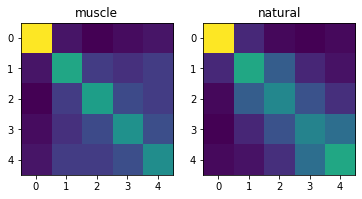

In [7]:
# Show the two underlying second moment matrices, these are pretty similar
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(M[i+1].G)
    plt.title(M[i+1].name)

In [8]:
# Fit the model in to the full group, using a individual scaling parameter for each 
T, theta = pcm.inference.fit_model_group(Y, M, fit_scale=True)
T

Fitting model 0
Fitting model 1
Fitting model 2
Fitting model 3


variable    likelihood                                               noise  \
model             null        muscle       natural    muscle+nat      null   
0        -42231.412711 -41966.470799 -41786.672956 -41786.672945  0.875853   
1        -34965.171104 -34923.791342 -34915.406608 -34915.406214  1.070401   
2        -34767.538097 -34679.107626 -34632.643241 -34632.643003  1.026408   
3        -45697.970627 -45609.052395 -45448.518276 -45448.518460  1.480699   
4        -31993.363827 -31866.288313 -31806.982719 -31806.982541  0.808482   
5        -41817.234010 -41632.061473 -41543.438786 -41543.438798  1.035696   
6        -50336.142592 -50201.799362 -50173.300358 -50173.300312  1.479001   

variable                                    scale                      \
model       muscle   natural muscle+nat      null    muscle   natural   
0         0.871286  0.868482   0.868482  0.109319  0.750145  0.786771   
1         1.067480  1.069075   1.069075  0.045008  0.324407  0.322917   
2         1.021219  1.019122   1.019123  0.059863  0.435483  0.463987   
3         1.479592  1.474026   1.474026  0.173031  1.193770  1.235628   
4         0.805621  0.805774   0.805774  0.073935  0.516338  0.532421   
5         1.031827  1.031649   1.031649  0.116696  0.801114  0.828773   
6         1.472401  1.474430   1.474430  0.101477  0.714043  0.723969   

variable            iterations                            
model    muscle+nat       null muscle natural muscle+nat  
0          1.209841          5      4       4          6  
1          0.496560          5      4       4          6  
2          0.713478          5      4       4          6  
3          1.900067          5      4       4          6  
4          0.818724          5      4       4          6  
5          1.274435          5      4       4          6  
6          1.113272          5      4       4          6

In [9]:
# crossvalidated likelihood is the same as the group fit for all 
# except the component and noise ceiling model
T_cv, theta_cv = pcm.inference.fit_model_group_crossval(Y, M, fit_scale=True)
T_cv

Fitting model 0
Fitting model 1
Fitting model 2
Fitting model 3


variable    likelihood                                               noise  \
model             null        muscle       natural    muscle+nat      null   
0        -42231.412711 -41966.470799 -41786.672956 -41786.672954  0.875853   
1        -34965.171104 -34923.791342 -34915.406608 -34915.406295  1.070401   
2        -34767.538097 -34679.107626 -34632.643241 -34632.643020  1.026408   
3        -45697.970627 -45609.052395 -45448.518276 -45448.518539  1.480699   
4        -31993.363827 -31866.288313 -31806.982719 -31806.982548  0.808482   
5        -41817.234010 -41632.061473 -41543.438786 -41543.438808  1.035696   
6        -50336.142592 -50201.799362 -50173.300358 -50173.300314  1.479001   

variable                                    scale                      \
model       muscle   natural muscle+nat      null    muscle   natural   
0         0.871286  0.868482   0.868483  0.109319  0.750145  0.786771   
1         1.067480  1.069075   1.069075  0.045008  0.324407  0.322917   
2         1.021219  1.019122   1.019122  0.059863  0.435483  0.463987   
3         1.479592  1.474026   1.474026  0.173031  1.193770  1.235628   
4         0.805621  0.805774   0.805774  0.073935  0.516338  0.532421   
5         1.031827  1.031649   1.031648  0.116696  0.801114  0.828773   
6         1.472401  1.474430   1.474428  0.101477  0.714043  0.723969   

variable             
model    muscle+nat  
0          1.260438  
1          0.445971  
2          0.680717  
3          2.125637  
4          0.790862  
5          1.325578  
6          1.132008

In [10]:
T_cv.likelihood.columns

Index(['null', 'muscle', 'natural', 'muscle+nat'], dtype='object', name='model')

In [11]:
T_cv.likelihood

model,null,muscle,natural,muscle+nat
0,-42231.412711,-41966.470799,-41786.672956,-41786.672954
1,-34965.171104,-34923.791342,-34915.406608,-34915.406295
2,-34767.538097,-34679.107626,-34632.643241,-34632.643020
3,-45697.970627,-45609.052395,-45448.518276,-45448.518539
4,-31993.363827,-31866.288313,-31806.982719,-31806.982548
5,-41817.234010,-41632.061473,-41543.438786,-41543.438808
6,-50336.142592,-50201.799362,-50173.300358,-50173.300314


In [12]:
T_in, theta_in = pcm.inference.fit_model_individ(Y, M, fit_scale=True)

Fitting Subj 0 model 0
Fitting Subj 0 model 1
Fitting Subj 0 model 2
Fitting Subj 0 model 3
Fitting Subj 1 model 0
Fitting Subj 1 model 1
Fitting Subj 1 model 2
Fitting Subj 1 model 3
Fitting Subj 2 model 0
Fitting Subj 2 model 1
Fitting Subj 2 model 2
Fitting Subj 2 model 3
Fitting Subj 3 model 0
Fitting Subj 3 model 1
Fitting Subj 3 model 2
Fitting Subj 3 model 3
Fitting Subj 4 model 0
Fitting Subj 4 model 1
Fitting Subj 4 model 2
Fitting Subj 4 model 3
Fitting Subj 5 model 0
Fitting Subj 5 model 1
Fitting Subj 5 model 2
Fitting Subj 5 model 3
Fitting Subj 6 model 0
Fitting Subj 6 model 1
Fitting Subj 6 model 2
Fitting Subj 6 model 3


In [13]:
T_in

variable    likelihood                                               noise  \
model             null        muscle       natural    muscle+nat      null   
0        -42231.412711 -41966.470799 -41786.672956 -41786.672927  0.875853   
1        -34965.171104 -34923.791342 -34915.406608 -34914.959612  1.070401   
2        -34767.538097 -34679.107626 -34632.643241 -34632.642946  1.026408   
3        -45697.970627 -45609.052395 -45448.518276 -45448.518254  1.480699   
4        -31993.363827 -31866.288313 -31806.982719 -31806.982521  0.808482   
5        -41817.234010 -41632.061473 -41543.438786 -41543.438769  1.035696   
6        -50336.142592 -50201.799362 -50173.300358 -50173.300306  1.479001   

variable                                iterations                            \
model       muscle   natural muscle+nat       null muscle natural muscle+nat   
0         0.871286  0.868482   0.868482        4.0    4.0     4.0        7.0   
1         1.067480  1.069075   1.068119        4.0    4.0     4.0       12.0   
2         1.021219  1.019122   1.019123        4.0    4.0     4.0        7.0   
3         1.479592  1.474026   1.474026        4.0    4.0     4.0        7.0   
4         0.805621  0.805774   0.805774        4.0    4.0     4.0        7.0   
5         1.031827  1.031649   1.031649        4.0    4.0     4.0        7.0   
6         1.472401  1.474430   1.474430        4.0    4.0     4.0        9.0   

variable     scale                                 
model         null    muscle   natural muscle+nat  
0         0.109319  0.750145  0.786771   0.997074  
1         0.045008  0.324407  0.322917   0.963004  
2         0.059863  0.435483  0.463987   0.995392  
3         0.173031  1.193770  1.235628   0.996431  
4         0.073935  0.516338  0.532421   0.996437  
5         0.116696  0.801114  0.828773   1.000000  
6         0.101477  0.714043  0.723969   0.996875

In [16]:
T_in.likelihood-T_cv.likelihood

model,null,muscle,natural,muscle+nat
0,0.000000e+00,1.455192e-11,-7.275958e-12,0.000027
1,0.000000e+00,7.275958e-12,0.000000e+00,0.446683
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000074
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000285
4,7.275958e-12,0.000000e+00,0.000000e+00,0.000027
5,7.275958e-12,0.000000e+00,0.000000e+00,0.000040
6,0.000000e+00,7.275958e-12,7.275958e-12,0.000008


In [47]:
m_names = T_cv.likelihood.columns.values
likelihood = T_cv.likelihood
a = likelihood.iloc[:,0].values.reshape(-1,1)
likelihood = likelihood - a
LL=pd.melt(likelihood)

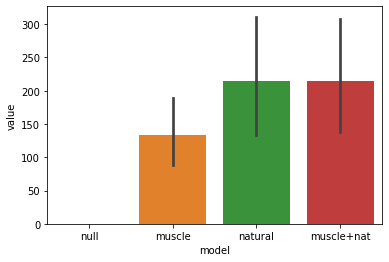

In [50]:
sns.barplot(x=LL.model,y=LL.value)